# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

**Дискретные фильтры** — фильтры, выполняющие преобразование спектра сигнала за счет различного коэффициента передачи для разных гармонических составляющих:

$$y_n = \sum_{k=0}^{N}c_kx_{n-k}-\sum_{k=1}^{M}d_ky_{n-k}$$

**Нерекурсивный фильтр** — дискретный фильтр с отсутствием обратной связи:

$$y_n = \sum_{k=0}^{N}c_kx_{n-k}$$

При $x_n=e^{i\omega n}$ передаточная функция нерекурсивного фильтра имеет вид:

$$H(w)=\sum_{k=0}^{N}c_ke^{-i\omega k} \qquad y_n=H(w)x_n$$

При записи через циклическую частоту $f$ передаточная функция выглядит следующим образом:

$$\tilde{H}(f)=H(2\pi f)=H(\omega)$$

**Сглаживание входного сигнала** — приближение (в смысле МНК) сигнала $s(t)$ функцией $y(t)$ по $N$ точкам:

$$\sum_{k=0}^{N}(s_k-y_k)^2 \Rightarrow min$$



## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Импорт необходимых модулей

In [10]:
import matplotlib.pyplot as plt
import numpy as np

f = np.linspace(-0.5, 0.5, 1000)


### Задание 1

Найдём передаточную функцию нерекурсивного фильтра, соответсвующего сглаживанию прямой линией по $2m+1$ точкам.

$y(t) = A+Bt$

$F(A,B) = \sum_{k=-m}^{k=m}(s_k-y_k)^2 = \sum_{k=-m}^{k=m}(s_k-A-Bk)^2 \Rightarrow \min$

$y_n = \frac1{2m+1} \sum_{k=n-m}^{k=n+m}s_k$

При $s_n=e^{i\omega n}$, $\quad y_n=H(w, m)e^{i \omega n}$

$H(\omega, m)=\frac1{2m+1} \sum_{k=n-m}^{k=n+m}e^{i \omega k}=\frac{\sin(\frac{(2m+1)\omega}{2})}{(2m+1) \sin(\frac{\omega}{2})}$

$\tilde{H}(f, m)=H(2\pi f, m)=\frac{\sin((2m+1)\pi f)}{(2m+1) \sin(\pi f)}$

По полученному графику можно видеть, что частота $f=0$ передаётся через фильтр с неизменной амплитудой, все остальные частоты претерпевают ослабление. Чем больше слагаемых используется в передаточной функции, тем более быстрыми становятся её колебания, тем быстрее происходит падение кривой в окрестности $f=0$ и тем больше огибающая колебаний прижимается к оси частот (амплитуды становятся ниже).

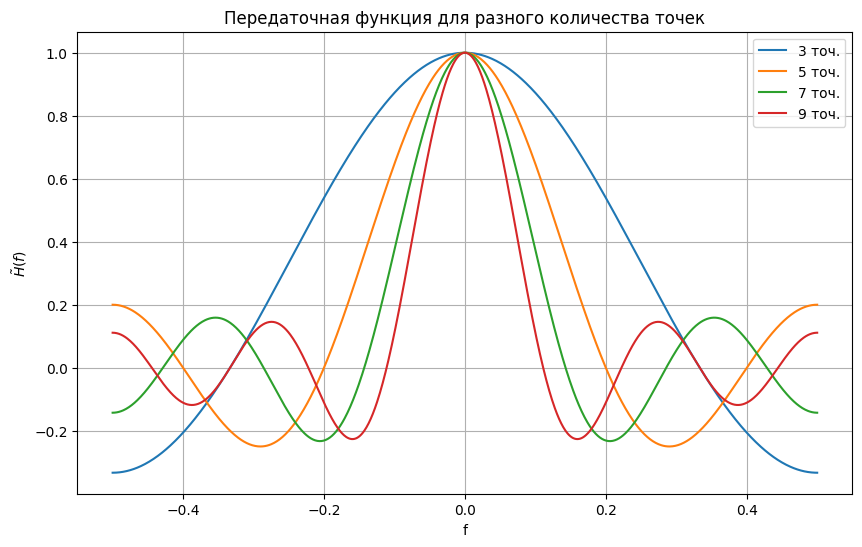

In [11]:
H_l = lambda f, m: np.sin((2 * m + 1) * np.pi * f) / ((2 * m + 1) * np.sin(np.pi * f))

m_values = [1, 2, 3, 4]  # Соответствует 3, 5, 7, 9 точкам

plt.figure(figsize=(10, 6))

for m in m_values:
    plt.plot(f, H_l(f, m), label=f'{2*m+1} точ.')

def show(db = False):
    plt.title('Передаточная функция для разного количества точек')
    plt.xlabel('f')
    plt.ylabel(r'$\tilde H(f)$' + (', dB' if db  else ''))
    plt.legend()
    plt.grid(True)
    plt.show()
show()

### Задание 2

Найдём передаточную функцию нерекурсивного фильтра, соответсвующего сглаживанию полиномом второй степени по 7, 9, 11, 13 точкам.

$y(t) = A+Bt+Ct^2$

$F(A,B,C) = \sum_{k=-m}^{k=m}(s_k-A-Bk-Ck^2)^2 \Rightarrow \min$

$y_n = \frac1a \sum_{k=n-m}^{k=n+m}c_ks_k$

$H(\omega) = \frac1a \sum_{k=0}^{k=m}d_k \cos(k\omega)$

$d_k=c_k$ при $k=0$, $\qquad d_k=2c_k$ при $k \ne 0$

$\tilde{H}(f)=H(2\pi f)=\frac1a \sum_{k=0}^{k=m}d_k \cos(2k\pi f)$

Для 7 точек:

$a=21$

$c = [-2, 3, 6, 7, 6, 3, -2] \Rightarrow d = [7, 12, 6, -4]$

Для 9 точек: $\quad a=231 \qquad d=[59, 108, 78, 28, -42]$

Для 11 точек: $\quad a=429 \qquad d=[89, 168, 138, 88, 18, -72]$

Для 13 точек: $\quad a=143 \qquad d=[25, 48, 42, 32, 18, 0, -22]$

Полученный график напоминает график из предыдущего задания, поэтому выводы можно сделать аналогичные. Единственным значимым отличием является более высокий порядок касания в точке $f=0$.


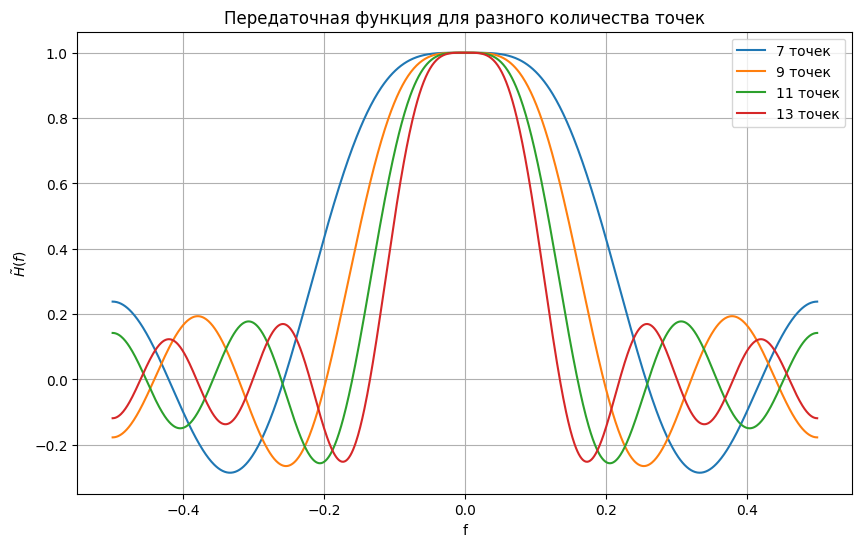

In [12]:

H = lambda a, d, f: sum([d[k]*np.cos(2*k*np.pi*f) for k in range(len(d))])/a

plt.figure(figsize=(10, 6))

H_q_7 = lambda f: H(21, [7, 12, 6, -4], f)
H_q_9 = lambda f: H(231, [59, 108, 78, 28, -42], f)
H_q_11 = lambda f: H(429, [89, 168, 138, 88, 18, -72], f)
H_q_13 = lambda f: H(143, [25, 48, 42, 32, 18, 0, -22], f)

plt.plot(f, H_q_7(f), label='7 точек')
plt.plot(f, H_q_9(f), label='9 точек')
plt.plot(f, H_q_11(f), label='11 точек')
plt.plot(f, H_q_13(f), label='13 точек')

show()

### Задание 3

Найдём передаточную функцию нерекурсивного фильтра, соответсвующего сглаживанию полиномом четвёртой степени по 9, 11, 13, 15 точкам.

$y(t) = A+Bt+Ct^2+Dt^3+Et^4$

$F(A,B,C,D,E) = \sum_{k=-m}^{k=m}(s_k-A-Bk-Ck^2-Dt^3-Et^4)^2 \Rightarrow \min$

$\tilde{H}(f)=H(2\pi f)=\frac1a \sum_{k=0}^{k=m}d_k \cos(2k\pi f)$

Вычисляем коэффициенты аналогичным образом:

Для 9 точек: $\quad a=429 \qquad d=[179, 270, 60, -110, 30]$

Для 11 точек: $\quad a=429 \qquad d=[143, 240, 120, -20, -90, 36]$

Для 13 точек: $\quad a=2431 \qquad d=[677, 1200, 780, 220, -270, -396, 220]$

Для 15 точек: $\quad a=46189 \qquad d=[11063, 20250, 15000, 7510, -330, -5874, -5720, 4290]$

По графику можно сделать аналогичные выводы как и в предыдущих пунктах.


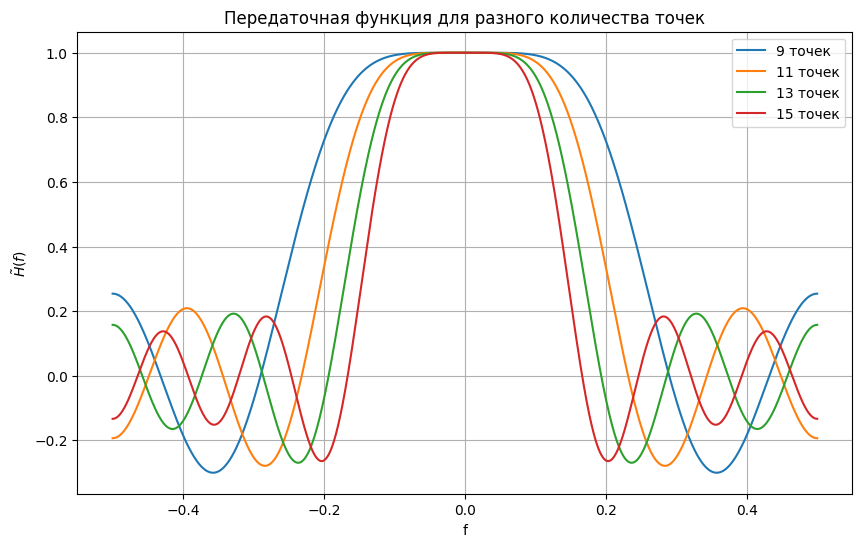

In [13]:
plt.figure(figsize=(10, 6))

H_t_9 = lambda f: H(429, [179, 270, 60, -110, 30], f)
H_t_11 = lambda f: H(429, [143, 240, 120, -20, -90, 36], f)
H_t_13 = lambda f: H(2431, [677, 1200, 780, 220, -270, -396, 220], f)
H_t_15 = lambda f: H(46189, [11063, 20250, 15000, 7510, -330, -5874, -5720, 4290], f)

plt.plot(f, H_t_9(f), label='9 точек')
plt.plot(f, H_t_11(f), label='11 точек')
plt.plot(f, H_t_13(f), label='13 точек')
plt.plot(f, H_t_15(f), label='15 точек')

show()

### Задание 4

Найдём передаточную функцию нерекурсивного фильтра, соответсвующего сглаживанию по формулам Спенсера по 15 и 21 точкам.

Формулы Спенсера по 15 и 21 точкам выглядят следующим образом: 

$y_n = \frac1a \sum_{k=n-m}^{k=n+m}c_ks_k$,

где для 15 точек: $\quad m=7, \quad a = 320, \quad c = [-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3]$

$\quad$ для 21 точек: $\quad m=10, \quad a = 350, \quad c = [-1, -3, -5, -5, -2, 6, 18, 33, 47, 57, 60, 57, 47, 33, 18, 6, -2, -5, -5, -3, -1]$

$\tilde{H}(f)=H(2\pi f)=\frac1a \sum_{k=0}^{k=m}d_k \cos(2k\pi f)$

Вычисляем коэффициенты аналогичным образом:

Для 15 точек: $\quad a=320 \qquad d_k=[74, 134, 92, 42, 6, -10, -12, -6]$

Для 21 точки: $\quad a=350 \qquad d_k=[60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2]$

По графику можно сделать вывод, что обе кривые сохраняют зачение сигнала в нулевой частоте, имеют быстрый спуск и малую амплитуду колебаний. При увеличении количества точек спуск становится более быстрым, а амплитуда колебаний меньше.


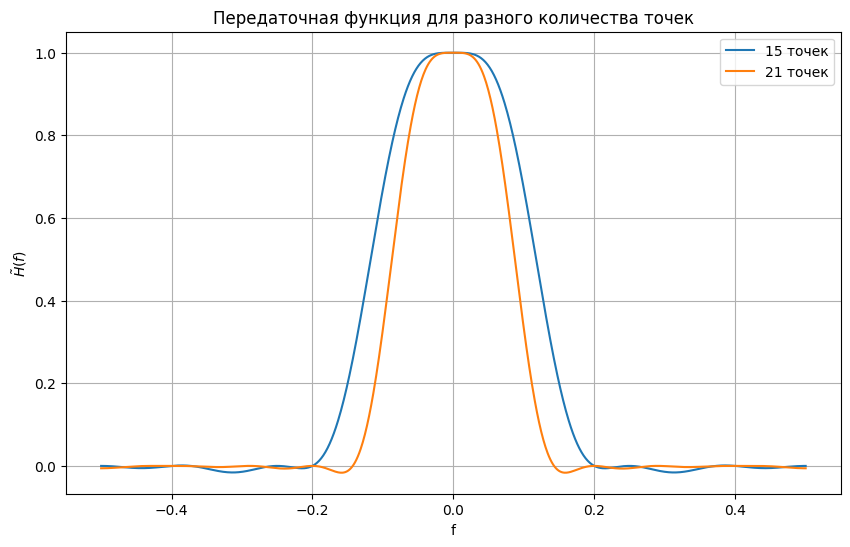

In [14]:
H_s_15 = lambda f: H(320, [74, 134, 92, 42, 6, -10, -12, -6], f)
H_s_21 = lambda f: H(350, [60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2], f)

plt.figure(figsize=(10, 6))

plt.plot(f, H_s_15(f), label='15 точек')
plt.plot(f, H_s_21(f), label='21 точек')

show()

### Задание 5

Построим графики из предыдущих пунктов в логарифмической шкале (Дб) по формуле:

$$D=10\lg(\frac{y_n}{s_n})=20\lg(H(f))$$

Отсюда $y_n=s_n*10^{0.05D}$, то есть значение $D=n$ будет определять усиление входного сигнала $s_n$ в $10^{0.05n}$ раз. 

Полученные графики получились более информативными, так как они показывают степень сглаживания при разных частотах и в то же время не имеют больших перепадов в значениях.

#### $\tilde{H}(f)$ из задания 1

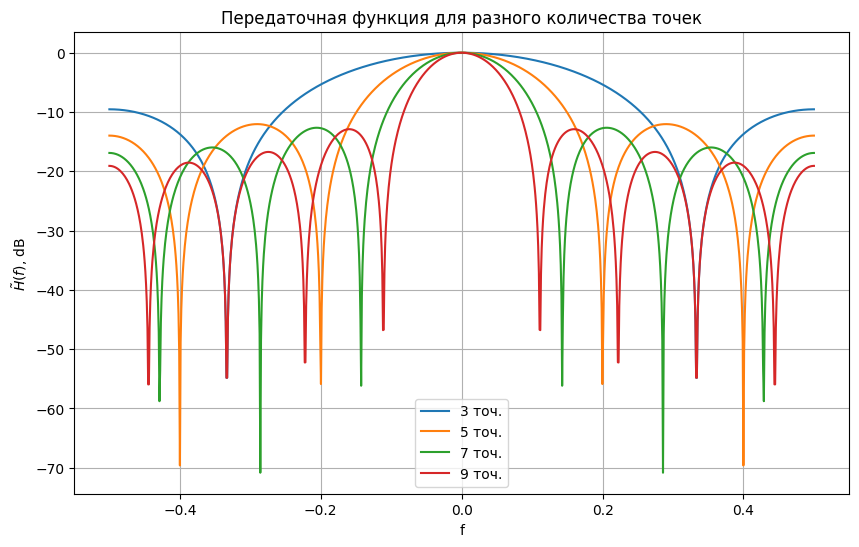

In [15]:
plt.figure(figsize=(10, 6))

for m in m_values:
    plt.plot(f, 20 * np.log10(np.abs(H_l(f, m)) + 1e-10), label=f'{2*m+1} точ.')

show(True)

#### $\tilde{H}(f)$ из задания 2

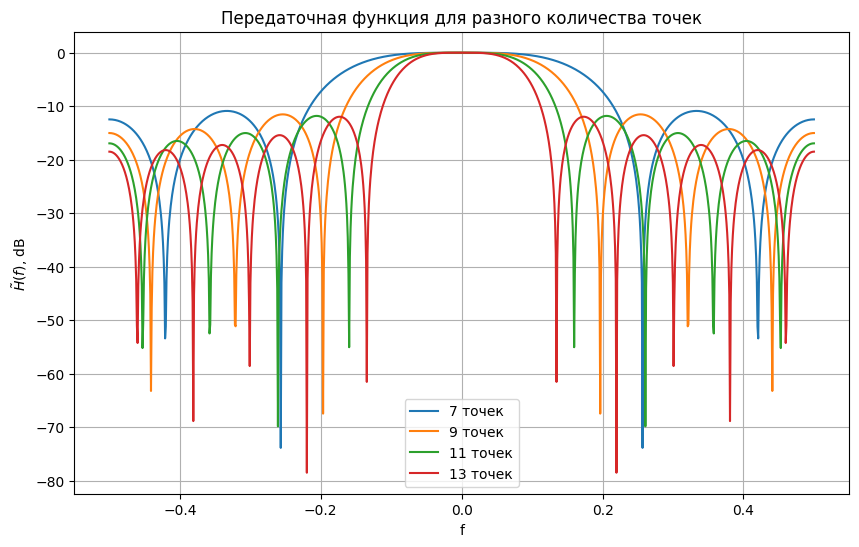

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(f, 20 * np.log10(np.abs(H_q_7(f))+1e-10), label='7 точек')
plt.plot(f, 20 * np.log10(np.abs(H_q_9(f))+1e-10), label='9 точек')
plt.plot(f, 20 * np.log10(np.abs(H_q_11(f))+1e-10), label='11 точек')
plt.plot(f, 20 * np.log10(np.abs(H_q_13(f))+1e-10), label='13 точек')

show(True)

#### $\tilde{H}(f)$ из задания 3

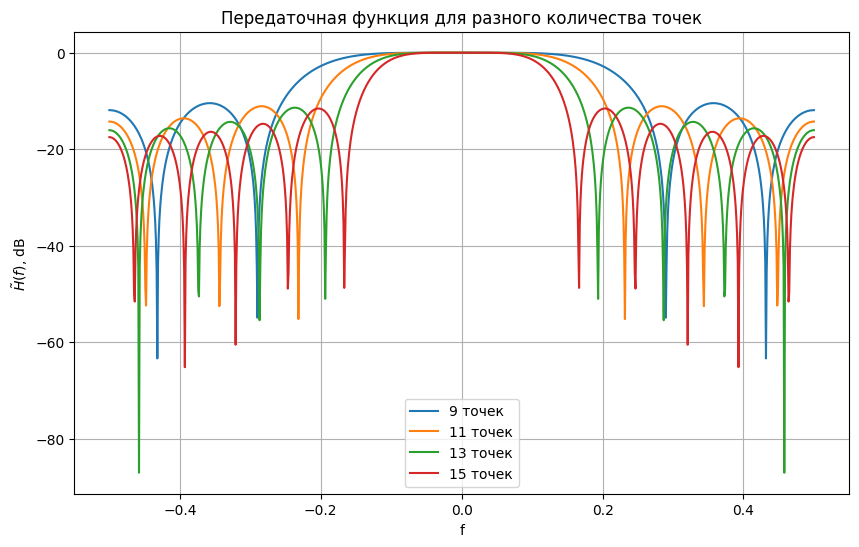

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(f, 20 * np.log10(np.abs(H_t_9(f))+1e-10), label='9 точек')
plt.plot(f, 20 * np.log10(np.abs(H_t_11(f))+1e-10), label='11 точек')
plt.plot(f, 20 * np.log10(np.abs(H_t_13(f))+1e-10), label='13 точек')
plt.plot(f, 20 * np.log10(np.abs(H_t_15(f))+1e-10), label='15 точек')

show(True)

#### $\tilde{H}(f)$ из задания 4

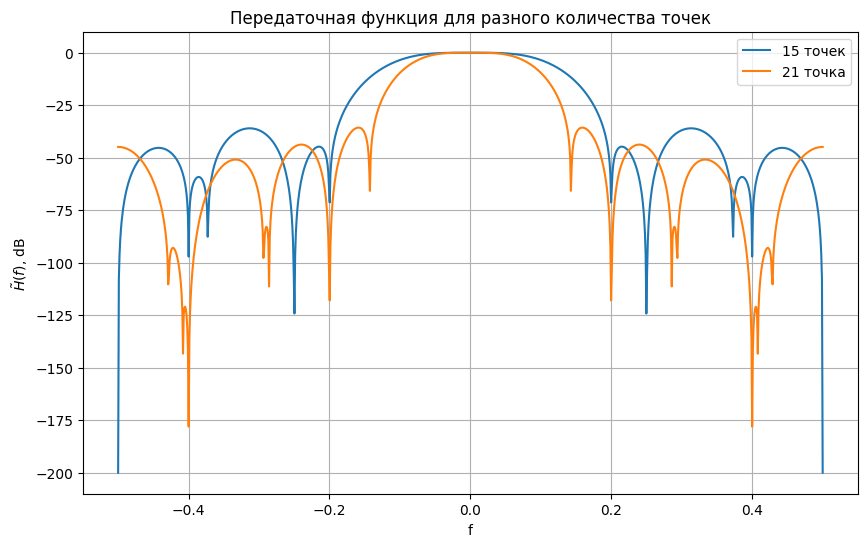

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(f, 20 * np.log10(np.abs(H_s_15(f)) + 1e-10), label='15 точек')
plt.plot(f, 20 * np.log10(np.abs(H_s_21(f)) + 1e-10), label='21 точка')

show(True)

### Задание 6

При сравнении всех полученных передаточных функций можно сделать следующие выводы:

- При увеличении количества точек, увеличивается частота колебаний и крутизна графика, а амплитуда колебаний уменьшается
- При увеличении степени полинома, по которому происходит сглаживание, увеличивается порядок касания у нулевой частоты (полоса пропускания становится шире).
- В независимости от перечисленных параметров в нулевой частоте сигнал никак не искажается
- При использовании формул Спенсера, амплитуда колебаний становится заметно меньше, а порядок касания у нулевой частоты больше.

## Выводы

В результате выполнения практической работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. Были выведены формулы передаточных функций для различных нерекурсивных фильтров, а с помощью програмных средств были получены графики подавления частот этими фильтрами. Были выведены зависимости между параметрами фильтров, таких как степень полиномов и количество используемых точек, и амплитудными и частотными характеристиками полученных передаточных функций. Так же для проведения более точного сравнительного анализа было изучено применение логарифмической шкалы для представления результатов.